# Project - Data Science

## Fullname (Nickname): Kantaphon Vareekasem (Tata)


## Project Topic: Gender Diversity

### Presentation
Google Slides at [Gender Diversity](https://docs.google.com/presentation/d/19ARhi1HvQw3S7YGY88xHDalE0VUGAqgsLuwQB7XRi_E/)

## Table of Contents:
* [Current Situation / Problem Statement](#first-bullet)
* [Objectives](#second-bullet)
* [Hypothesis-driven Questions](#third-bullet)
* [Dataset](#forth-bullet)
* [Data Preparation](#fifth-bullet)
* [EDA](#EDA)
* [Regression Analysis](#Regression)
* [Key Findings](#key_finding)

---
## Current Situation / Problem Statement <a class="anchor" id="first-bullet"></a>


1. The key issues of gender inequality in the workplace setting stem from stereotyping and discrimination where males and females face unequal gender norms regarding expectations and access to resources and opportunities, with lifelong consequences for both financial and social terms.
2. Unconscious gender bias has created barriers to recruitment. This result in lower profitability and overall performance from a lack of diverse thinking and understanding of the difference.
3. Gender oppression leads to a toxic work environment and a lower attrition rate for employees. History suggests that when we fight gender oppression, societies are more stable, safe and prosperous, with happier, better-educated citizens.






## Objectives <a class="anchor" id="second-bullet"></a>
1. Find factors impacting on performance and retention on the company level. So, the company can provide inclusive policies.
2. Check if there is a relationship between gender diversity and performance. So we can quantify the level of impacts. To Promote Better workplace culture and diversity to foster long-term sustainable growth.
3. Find factors impacting on performance and retention on individual level.

## Hypothesis-driven Questions <a class="anchor" id="third-bullet"></a>


1.   Does increased diversity in the department lead to better outcomes and attrition rates? 
2.   Are there gender specific factors which significantly impact on performance and retention?
3. Is there significant difference between genders on pays, performance and retention for each department?



## Dataset <a class="anchor" id="fourth-bullet"></a>
https://www.kaggle.com/code/azmainmorshed/ibm-employee-churn-prediction-eda

In [71]:
import sys 
print("User Current Version:-", sys.version)

User Current Version:- 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [72]:
# Import libraries and Data Set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import researchpy as rp
import scipy.stats as stats

# Data Set from Kaggle:IBM HR Analytic Attrition
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv') #Fictional Data From https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
#print(df.tail(5))
#print(df.info(5))

import warnings

#Suppress warnings
warnings.filterwarnings('ignore')


## Data Preparation & Data Cleaning <a class="anchor" id="fifth-bullet"></a>


Description...
Group by Department
    Count by Gender
    
Diversity
Performance -> Department Level
Performance -> Variance for individual level
1. The data is already cleaned with no missing value
2. We would rename gender value for female and male to 1 an 0. So, we can easily find the proportional of each department.
3. We would perform analysis using linear regression on each department and a specific model for each gender to determine if there is a different between the gender.

#### Section 1

In [73]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [74]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [75]:
#df.info

In [76]:
# group by Gender -> Count, Sum
#Replace ("Female") to 1
df["Gender"].replace("Female",1,inplace=True)
df["Gender"].replace("Male",0,inplace=True)

In [77]:
# Attrition: Replace Yes to 1 (Left company) : Lower attrition is preferred. 
df["Attrition"].replace("Yes",1,inplace=True)
df["Attrition"].replace("No",0,inplace=True)

In [78]:
# Total count
df["Gender"].mean()
# 40% of the employees are female at company wide level
# This is equivalent to Female to Male Ratio of 2 Females to 3 Males Employees (0.4/0.6)

0.4

In [79]:
df.groupby(["Department","Gender"]).size()
# Gender Breakdown by department
# Please note that 0 is Male and 1 is Female

Department              Gender
Human Resources         0          43
                        1          20
Research & Development  0         582
                        1         379
Sales                   0         257
                        1         189
dtype: int64

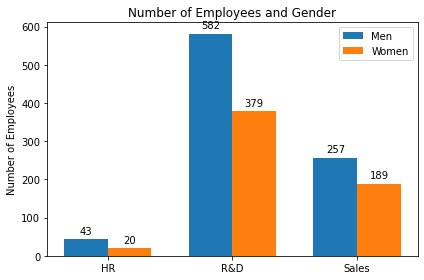

In [80]:
# creating the dataset
labels = ["HR","R&D", "Sales"]
men_count = [43,582,257]
women_count = [20,379,189]

# creating the bar plot
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_count , width, label='Men')
rects2 = ax.bar(x + width/2, women_count, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Employees')
ax.set_title('Number of Employees and Gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [81]:
# Gender diversity # Female to Male Ratio
HR = round((20/(43)),4)
RD = round((379/(582)),4)
SA = round((189/(257)),4)
print("HR Female to Male Ratio is",HR*100, "%\nR&D Female to Male Ratio is",RD*100,"%\nSales Female to Male Ratio is",SA*100, "%")#
# Please note that this is equivalent to 46.51 females per 100 males employees in HR department.

HR Female to Male Ratio is 46.51 %
R&D Female to Male Ratio is 65.12 %
Sales Female to Male Ratio is 73.54 %


In [82]:
df.groupby(["Gender"])["MonthlyIncome"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,882,5627608,6380.507937,4714.856577
1,588,3931701,6686.566327,4695.608507


In [83]:
men = df[df['Gender'] == 0] # Men Dataset
women = df[df['Gender'] == 1]# Women Dataset

In [84]:
stats.ttest_ind(men['MonthlyIncome'],women['MonthlyIncome'],equal_var=False)

Ttest_indResult(statistic=-1.2222619989669412, pvalue=0.22183687764870916)

In [85]:
df.groupby(["Gender","JobLevel"]).size()

Gender  JobLevel
0       1           344
        2           314
        3           124
        4            55
        5            45
1       1           199
        2           220
        3            94
        4            51
        5            24
dtype: int64

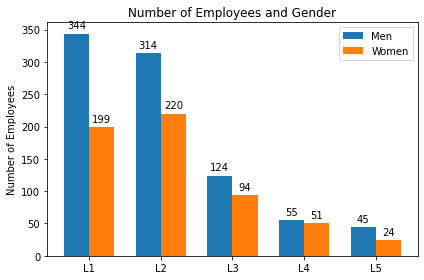

In [86]:
# creating the dataset
labels = ['L1', 'L2', 'L3', 'L4', 'L5']
men_count = [344, 314, 124, 55, 45]
women_count = [199, 220, 94, 51, 24]

# creating the bar plot
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_count , width, label='Men')
rects2 = ax.bar(x + width/2, women_count, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Employees')
ax.set_title('Number of Employees and Gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [87]:
# Female to Male Ratio -> Round to 2 decimal (significant level)
L1 = round((199/344),4)
L2 = round((220/314),4)
L3 = round((94/124),4)
L4 = round((51/55),4)
L5 = round((24/45),4)
print("The female to male ratio for each job level\nL1 is",L1*100, "%\nL2 is",L2*100,"%\nL3 is",L3*100, "%\nL4 is",L4*100,"%\nL5 is",L5*100, "%")

The female to male ratio for each job level
L1 is 57.85 %
L2 is 70.06 %
L3 is 75.81 %
L4 is 92.73 %
L5 is 53.33 %


In [88]:
df.groupby(["Gender"])["JobLevel"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,882,1789,2.028345,1.113477
1,588,1245,2.117347,1.095836


In [89]:
stats.ttest_ind(men["JobLevel"],women["JobLevel"],equal_var=False)

Ttest_indResult(statistic=-1.5157194127990206, pvalue=0.12983882232192842)

In [90]:
df.groupby(["Gender"])["Attrition"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,150,150,0.170068,0.375906
1,87,87,0.147959,0.355362


In [91]:
stats.ttest_ind(men["Attrition"],women["Attrition"],equal_var=False)

Ttest_indResult(statistic=1.1417334899103713, pvalue=0.2537741994753171)

In [92]:
# Performance and Attrition by Department
grouped =df.groupby(["Department"])
#print(grouped)
HRDF = grouped.get_group("Human Resources")
print (HRDF)

RDDF = grouped.get_group("Research & Development")
print (RDDF)

SADF = grouped.get_group("Sales")
print (SADF)
#print (SalesDF[MonthlyIncome])


      Age  Attrition     BusinessTravel  DailyRate       Department  \
79     46          0      Travel_Rarely        945  Human Resources   
100    37          1      Travel_Rarely        807  Human Resources   
105    59          0         Non-Travel       1420  Human Resources   
112    54          0         Non-Travel        142  Human Resources   
134    26          0      Travel_Rarely       1355  Human Resources   
...   ...        ...                ...        ...              ...   
1379   27          1  Travel_Frequently       1337  Human Resources   
1400   38          0  Travel_Frequently       1444  Human Resources   
1401   55          0      Travel_Rarely        189  Human Resources   
1411   25          0      Travel_Rarely        309  Human Resources   
1450   35          0      Travel_Rarely       1146  Human Resources   

      DistanceFromHome  Education   EducationField  EmployeeCount  \
79                   5          2          Medical              1   
100      

<AxesSubplot:>

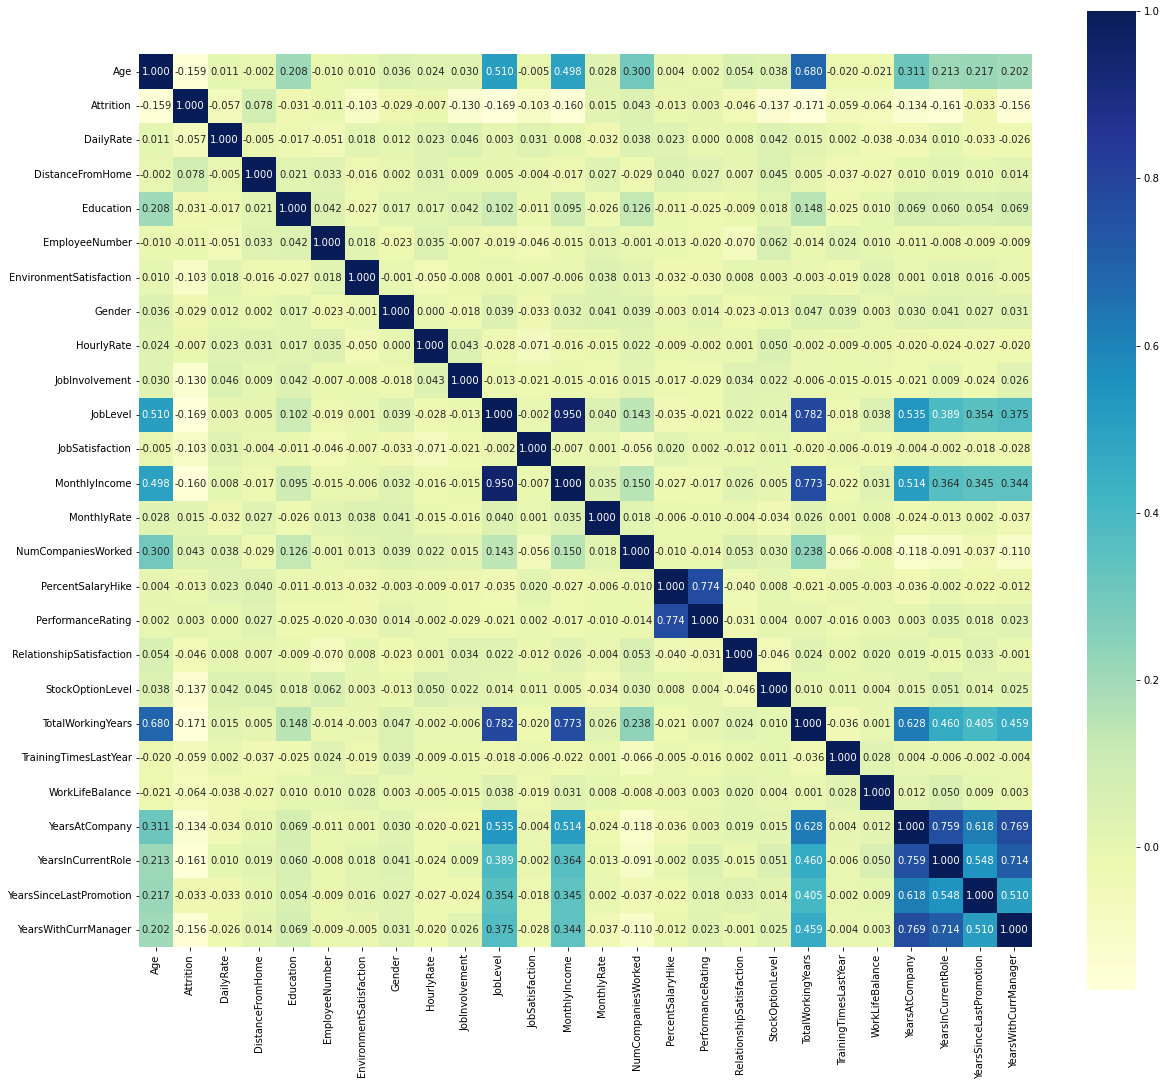

In [93]:
# We can use a heatmap to check correlation between the variables.
df = df.drop(['EmployeeCount','StandardHours'], axis=1) # dropping these two columns because they only have one value
corr = df.corr() # Attrition, Monthly Income, Gender, Job Level, Performance Rating, TotalWorkingYears
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,square=True,fmt='.3f',annot=True,cmap="YlGnBu")

From this graph, The correlation between gender and other features may not be strong. This indicate the difference between gender might not be significant. Yet, this project would 

In [94]:
df.groupby(["Department"])["MonthlyIncome"].agg([np.sum, np.mean, np.std]) # 

,sum,mean,std
Department,,,
Human Resources,419234,6654.507937,5788.732921
Research & Development,6036284,6281.252862,4895.835087
Sales,3103791,6959.172646,4058.739322


In [95]:
df.groupby(["Department"])["PerformanceRating"].agg([np.sum, np.mean, np.std])

,sum,mean,std
Department,,,
Human Resources,198,3.142857,0.352738
Research & Development,3039,3.162331,0.368946
Sales,1399,3.136771,0.343992


In [96]:
df.groupby(["Department"])["Attrition"].agg([np.sum, np.mean, np.std])

,sum,mean,std
Department,,,
Human Resources,12,0.190476,0.395831
Research & Development,133,0.138398,0.345497
Sales,92,0.206278,0.405087


# Exploratory Data Analysis (EDA) <a class="anchor" id="EDA"></a>

## HR Department

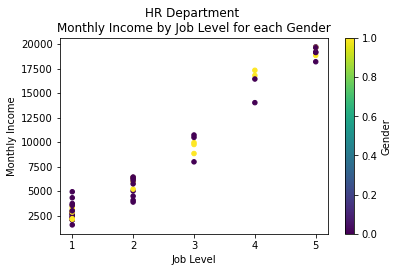

In [97]:
# Performance and Attrition by Department & Gender
#df.plot(kind = 'scatter', x = 'YearsAtCompany', y = 'MonthlyIncome')
HRDF.plot(kind = 'scatter', x = 'JobLevel', y = 'MonthlyIncome', c = "Gender", colormap='viridis')
plt.title("HR Department \nMonthly Income by Job Level for each Gender")
plt.xlabel("Job Level")
plt.ylabel("Monthly Income")
plt.xticks([1,2,3,4,5])
plt.rcParams["figure.subplot.bottom"] = 0.2
plt.show()

In [98]:
HRDF.groupby(["Gender"])["MonthlyIncome"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,43,273954,6371.023256,5668.652996
1,20,145280,7264.000000,6143.404756


In [99]:
HRmen = HRDF[HRDF['Gender'] == 0] # Male Dataset in HR department
HRwomen = HRDF[HRDF['Gender'] == 1] # Female Dataset in HR department

In [100]:
#HRmen

In [101]:
HRDF.groupby(["Gender"])["MonthlyIncome"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,43,273954,6371.023256,5668.652996
1,20,145280,7264.000000,6143.404756


In [102]:
stats.ttest_ind(HRmen["MonthlyIncome"],HRwomen["MonthlyIncome"],equal_var=False)
# P value = 0.58 > 0.05. This result states that there is difference in income for men and women.
# Women tends to have higher income.

Ttest_indResult(statistic=-0.550176702143539, pvalue=0.5857352805347261)

In [103]:
HRDF.groupby(["Gender"])["PerformanceRating"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,43,135,3.139535,0.350605
1,20,63,3.150000,0.366348


In [104]:
stats.ttest_ind(HRmen["PerformanceRating"],HRwomen["PerformanceRating"],equal_var=False)
# P value = 1.0 > 0.05. This result states that there is difference in performance for men and women.
# Women tends to have higher performance

Ttest_indResult(statistic=-0.1069808182754215, pvalue=0.9154030615000066)

In [105]:
HRDF.groupby(["Gender"])["Attrition"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,6,6,0.139535,0.350605
1,6,6,0.300000,0.470162


In [106]:
stats.ttest_ind(HRmen["Attrition"],HRwomen["Attrition"])
# P value = (1-0.13) > 0.05. This result states that there is difference in performance for men and women.
# Women tends to leave more than men

Ttest_indResult(statistic=-1.5132888984074688, pvalue=0.13537055365006634)

## R&D Department

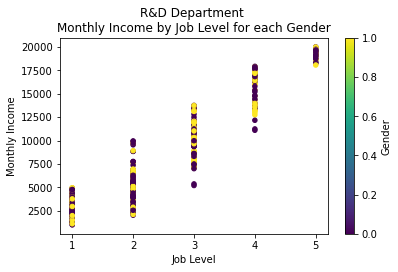

In [107]:
RDDF.plot(kind = 'scatter', x = 'JobLevel', y = 'MonthlyIncome', c = "Gender", colormap='viridis')
plt.title("R&D Department \nMonthly Income by Job Level for each Gender")
plt.xlabel("Job Level")
plt.ylabel("Monthly Income")
plt.rcParams["figure.subplot.bottom"] = 0.2
plt.show()

In [108]:
RDDF.groupby(["Gender"])["MonthlyIncome"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,582,3567595,6129.888316,4950.209893
1,379,2468689,6513.691293,4808.354321


In [109]:
RDmen = RDDF[RDDF['Gender'] == 0]
RDwomen = RDDF[RDDF['Gender'] == 1]

In [110]:
RDDF.groupby(["Gender"])["MonthlyIncome"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,582,3567595,6129.888316,4950.209893
1,379,2468689,6513.691293,4808.354321


In [111]:
stats.ttest_ind(RDmen["MonthlyIncome"],RDwomen["MonthlyIncome"],equal_var=False)
# P value = 0.23 > 0.05. This result states that there is difference in income for men and women.
# Women tends to have higher income.

Ttest_indResult(statistic=-1.1952626158538362, pvalue=0.23232817394403846)

In [112]:
RDDF.groupby(["Gender"])["PerformanceRating"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,582,1841,3.16323,0.369894
1,379,1198,3.16095,0.367970


In [113]:
stats.ttest_ind(RDmen["PerformanceRating"],RDwomen["PerformanceRating"],equal_var = False)
# P value = (1.0-0.925) > 0.05. This result states that there is difference in performance for men and women.
# The performance is similar at 10% significant level.
# At 5%, Men tends to have better performance.

Ttest_indResult(statistic=0.09369504420806876, pvalue=0.9253745561940446)

In [114]:
RDDF.groupby(["Gender"])["Attrition"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,90,90,0.154639,0.361871
1,43,43,0.113456,0.317569


In [115]:
stats.ttest_ind(RDmen["Attrition"],RDwomen["Attrition"],equal_var=False)
# P value = (1-0.06) > 0.05. This result states that there is difference in performance for men and women.
# Women tends to have less attrition.

Ttest_indResult(statistic=1.858366092185988, pvalue=0.06345125407488328)

## Sales Department

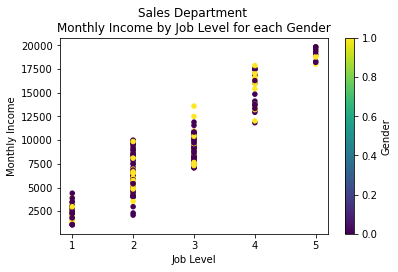

In [116]:
SADF.plot(kind = 'scatter', x = 'JobLevel', y = 'MonthlyIncome', c = "Gender", colormap='viridis')
plt.title("Sales Department \nMonthly Income by Job Level for each Gender")
plt.xlabel("Job Level")
plt.ylabel("Monthly Income")
plt.rcParams["figure.subplot.bottom"] = 0.2
plt.show()

In [117]:
SADF.groupby(["Gender"])["MonthlyIncome"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,257,1786059,6949.645914,3892.068876
1,189,1317732,6972.126984,4285.461006


In [118]:
SAmen = SADF[SADF['Gender'] == 0]
SAwomen = SADF[SADF['Gender'] == 1]

In [119]:
SADF.groupby(["Gender"])["MonthlyIncome"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,257,1786059,6949.645914,3892.068876
1,189,1317732,6972.126984,4285.461006


In [120]:
stats.ttest_ind(SAmen["MonthlyIncome"],SAwomen["MonthlyIncome"],equal_var=False)
# P value = (1.0 - 0.9546) > 0.05. This result states that there is no difference in income for men and women.

Ttest_indResult(statistic=-0.056898119831839365, pvalue=0.9546560991741373)

In [121]:
SADF.groupby(["Gender"])["PerformanceRating"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,257,802,3.120623,0.326324
1,189,597,3.158730,0.366395


In [122]:
stats.ttest_ind(SAmen["PerformanceRating"],SAwomen["PerformanceRating"],equal_var=False)
# P value = (1.0-0.256) > 0.05. This result states that there is difference in performance for men and women.
# Women tend to have better performance

Ttest_indResult(statistic=-1.1363313096698235, pvalue=0.2565395793289066)

In [123]:
SADF.groupby(["Gender"])["Attrition"].agg([np.count_nonzero,np.sum, np.mean, np.std])

,count_nonzero,sum,mean,std
Gender,,,,
0,54,54,0.210117,0.408186
1,38,38,0.201058,0.401856


In [124]:
stats.ttest_ind(SAmen["Attrition"],SAwomen["Attrition"],equal_var=False)
# Women tend to have better attrition rates

Ttest_indResult(statistic=0.23367642539103514, pvalue=0.8153531837098424)

# Regression Analysis <a class="anchor" id="Regression"></a>

We would look at 3 key factors for each departments: Human Resource(HR), Research and Development(R&D), Sales. To visualise any difference between the gender groups if any is present: 
1. Monthly Income
2. Performance Rating
3. Attrition

## HR Department

#### Section 1 

Text(0.5, 1.0, 'HR Department\n Income Linear Regression by Gender ')

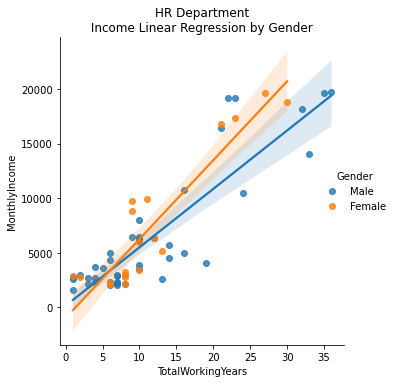

In [138]:
# Linear Regression for HR: We use TotalWorkingYears as substitute for experience as it is highly correlate with income.
g = sns.lmplot(x = 'TotalWorkingYears',y ='MonthlyIncome', data=HRDF, hue = "Gender", fit_reg=True,facet_kws={'legend_out': True})
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.title("HR Department\n Income Linear Regression by Gender ")

# Line represents predicted value for each gender. Dot represents the actual value. Shaded Area is the 95% confidence level of the model.

Female employees on average start with slightly lower pay but increase faster over the years.

In [126]:
HRDF.groupby(["Gender"])["MonthlyIncome"].agg([np.sum, np.mean, np.std])

,sum,mean,std
Gender,,,
0,273954,6371.023256,5668.652996
1,145280,7264.000000,6143.404756


In [127]:
X = np.array(HRDF['TotalWorkingYears']).reshape(-1, 1)
y = np.array(HRDF['MonthlyIncome']).reshape(-1, 1)
  
#HRDF.dropna(inplace = True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X, y)
print(regr.score(X, y))

0.7855354525077157


Text(0.5, 1.0, 'HR Department\n Performance Linear Regression by Gender ')

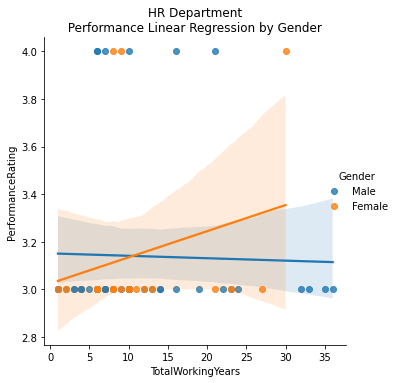

In [128]:
#sns.lmplot(x = 'TotalWorkingYears',y ='PerformanceRating', data=HRDF, hue = "Gender", fit_reg=True)
g = sns.lmplot(x = 'TotalWorkingYears',y ='PerformanceRating', data=HRDF, hue = "Gender", fit_reg=True,facet_kws={'legend_out': True})
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.title("HR Department\n Performance Linear Regression by Gender ")

Female on average start with slightly lower performance rating and improve considerably over the years.

Text(0.5, 1.0, 'HR Department\n Attrition Rate Logistic Regression by Gender ')

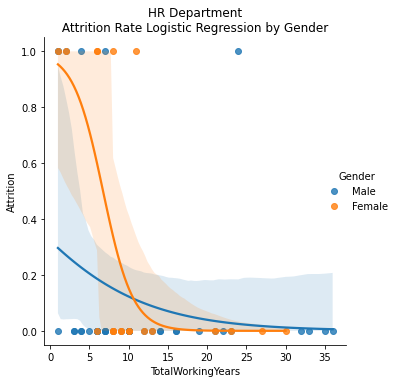

In [129]:
#sns.lmplot(x = 'TotalWorkingYears',y ='Attrition', data=HRDF, fit_reg=True, logistic=True, col = "Gender")
g = sns.lmplot(x = 'TotalWorkingYears',y ='Attrition', data=HRDF, hue = "Gender", fit_reg=True,logistic=True,facet_kws={'legend_out': True})
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.title("HR Department\n Attrition Rate Logistic Regression by Gender ")

### Logistic Regression is used for binary outcomes: Y = 1: Left the Company, Y = 0:Stay in the Company

##### There might be possible gender issues in HR departments. 
There is significant numbers of female employees who leave especially at the entry level. Further investigation should be conducted to find the root causes of attrition level.

Attrition Rate is a measurement of **how many employees leave a company within a given period (1 year).** <br>
Low Attrition Rate is preferred. 0.1 or 10% means 10 out 100 employees left the company in a year. <br> Many organizations aim to keep **attrition rates under 10%.**


#### Section 2

Text(0.5, 1.0, 'R&D Department\n Income Linear Regression by Gender ')

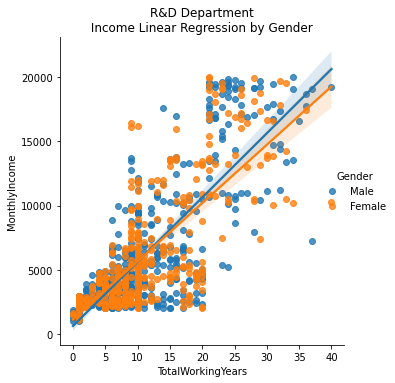

In [130]:
# Linear Regression for R&D
#sns.lmplot(x = 'TotalWorkingYears',y ='MonthlyIncome', data=RDDF, hue = "Gender", fit_reg=True)
g = sns.lmplot(x = 'TotalWorkingYears',y ='MonthlyIncome', data=RDDF, hue = "Gender", fit_reg=True,facet_kws={'legend_out': True})
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.title("R&D Department\n Income Linear Regression by Gender ")

In [131]:
X = np.array(RDDF['TotalWorkingYears']).reshape(-1, 1)
y = np.array(RDDF['MonthlyIncome']).reshape(-1, 1)
  
#HRDF.dropna(inplace = True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X, y)
print(regr.score(X, y))

0.5881217869992634


Text(0.5, 1.0, 'R&D Department\n Performance Linear Regression by Gender ')

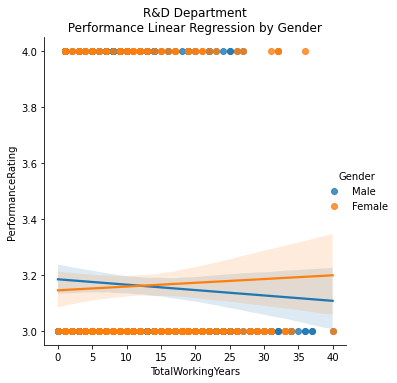

In [132]:
#sns.lmplot(x = 'TotalWorkingYears',y ='PerformanceRating', data=RDDF, hue = "Gender", fit_reg=True)
g = sns.lmplot(x = 'TotalWorkingYears',y ='PerformanceRating', data=RDDF, hue = "Gender", fit_reg=True,facet_kws={'legend_out': True})
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.title("R&D Department\n Performance Linear Regression by Gender ")

Text(0.5, 1.0, 'R&D Department\n Attrition Rate Logistic Regression by Gender ')

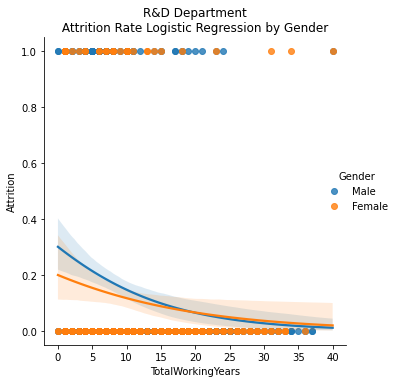

In [133]:
#sns.lmplot(x = 'TotalWorkingYears',y ='Attrition', data=RDDF, fit_reg=True, logistic=True, col = "Gender")
g = sns.lmplot(x = 'TotalWorkingYears',y ='Attrition', data=RDDF, hue = "Gender", fit_reg=True,logistic=True,facet_kws={'legend_out': True})
new_labels = ['Male', 'Female'] # 
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.title("R&D Department\n Attrition Rate Logistic Regression by Gender ")

#### Section 3

Text(0.5, 1.0, 'Sales Department\n Income Linear Regression by Gender ')

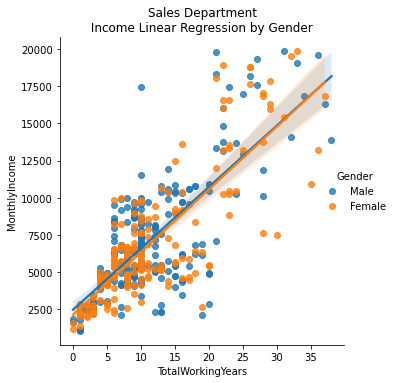

In [135]:
# Linear Regression for Sales
#sns.lmplot(x = 'TotalWorkingYears',y ='MonthlyIncome', data=SADF, hue = "Gender", fit_reg=True)
g = sns.lmplot(x = 'TotalWorkingYears',y ='MonthlyIncome', data=SADF, hue = "Gender", fit_reg=True,facet_kws={'legend_out': True})
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.title("Sales Department\n Income Linear Regression by Gender ")

The model predicts that female and male employees have similar monthly income and growth. This indicate that there is high gender equality in the sale department.

Text(0.5, 1.0, 'Sales Department\n Performance Linear Regression by Gender ')

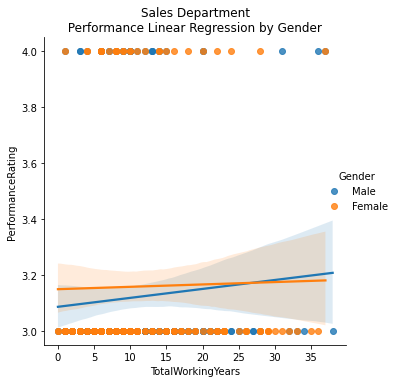

In [136]:
#sns.lmplot(x = 'TotalWorkingYears',y ='PerformanceRating', data=SADF, hue = "Gender", fit_reg=True)
g = sns.lmplot(x = 'TotalWorkingYears',y ='PerformanceRating', data=SADF, hue = "Gender", fit_reg=True,facet_kws={'legend_out': True})
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.title("Sales Department\n Performance Linear Regression by Gender ")

Text(0.5, 1.0, 'Sales Department\n Attrition Rate Logistic Regression by Gender ')

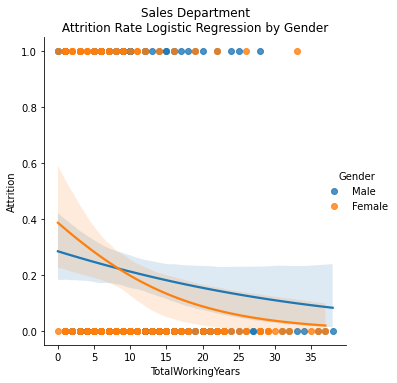

In [137]:
#sns.lmplot(x = 'TotalWorkingYears',y ='Attrition', data=SADF, fit_reg=True, logistic=True, col = "Gender")
g = sns.lmplot(x = 'TotalWorkingYears',y ='Attrition', data=SADF, hue = "Gender", fit_reg=True,logistic=True,facet_kws={'legend_out': True})
new_labels = ['Male', 'Female']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
plt.title("Sales Department\n Attrition Rate Logistic Regression by Gender ")

## Key Findings <a class="anchor" id="key_finding"></a>

1. Female employees tend to have higher performance and lower attrition rates than male employees except for the HR department where female employees left at very high numbers.
2. HR department might have gender discrimination issues as the proportion of female employee are considerably lower at 31.74% from the average of 40%. Moreover, attrition rate for female employees are very high at 30%.
3. The company lacks gender diversity and inclusion at all levels especially at entry-level and management levels. The female work proportion is only at 40% company level. The female to male ratio at 0.66  are considerably below national average at 0.80 or 45% of workforce. The lack of diversity might lower performance, creativity and adaptability.

<div class="alert alert-info">
<h3>What’s Next / Recommendation</h3>
</div>


1. The company should promote and advertise careers opportunities towards female employees as they tend to have better performance and attrition rates.
2. The company should further explore and find root causes of gender inequality and high attrition rates in the HR department.
3. The company should explore gender biases in hiring processes by using name-blind recuitment i.e. remove names and factors to reduce systemic and implicit biases. This would improve recruitment by create better qualified pools of candidates. 

<div class="alert alert-info">
<h3>Financial Benefit</h3>
</div>

1. The lower attrition would reduce recuitment and training costs significantly as employees tends to stay for longer periods.
2. Diverse companys tend to be more profitable as they take far bolder action to create a long-lasting inclusive culture and to promote inclusive behaviour. The positive work environment are likely to increase in creativity, innovation, and openness.
3. The company would attract the best talents and lower the risk of discrimination and lawsuits from employees. The equality of opportunity would promote true meritocracy by lowering biases and foster communities. 

<div class="alert alert-info">
<h3>Non-Financial Benefit</h3>
</div>

1. The improved diversity are likely to improve workplace environment. As people from different background can share and exchange their unique perspective. Hence, the team could solve problems in more efficient and creativity methods.
2. Investors tends to increase analysis on non-financial parts of the company. So, the diversity could reflect growth opportunitites and improve the company branding to the public.
3. Diverse workforce allow the company to better serve diverse customer base. Diverse team would have enough insight to be able to empathize with the customers they’re trying to help as they have similar values and culture.

# References

### Please note that this is a fictional dataset. Yet, the analysis could be applied to real situation.

1. https://www.forbes.com/sites/forbesinsights/2020/01/15/diversity-confirmed-to-boost-innovation-and-financial-results/?sh=293c92dcc4a6
2. https://www.mckinsey.com/featured-insights/diversity-and-inclusion/women-in-the-workplace
3. https://www.mckinsey.com/featured-insights/diversity-and-inclusion/diversity-wins-how-inclusion-matters
4. https://www.censia.com/blog/benefit-of-gender-diversity-workplace/